In [373]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [374]:
# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent


In [375]:
with open("Behavior of the urban traffic - modified.arff" , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [376]:
data = pd.read_csv("Behavior of the urban traffic - modified.csv")

In [377]:
data.describe()

,Immobilized_bus,Broken_Truck,Occurrence_involving_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Tree_on_the_road,Intermittent_Semaphore,Slowness_in_traffic_percent
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.335714,8.007143,0.007143,0.114286,0.007143,14.400000,0.035714,0.042857,0.014286,9.980714
std,0.652728,84.448912,0.084515,0.495820,0.084515,169.022573,0.221529,0.203262,0.119092,4.323583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.300000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.950000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.500000
max,4.000000,1000.000000,1.000000,4.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,23.400000


In [378]:
data.tail(15)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
125,13:30,0.0,1.0,F,0.0,0.0,NO,0.0,,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.7
126,14:00,1.0,2.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.3
127,14:30,0.0,0.0,F,1.0,0.0,NO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
128,15:00,0.0,1.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
129,15:30,2.0,0.0,F,1.0,-1.0,NO,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4
130,16:00,0.0,0.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.3
131,16:00,0.0,0.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.3
132,16:30,0.0,0.0,T,2.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
133,17:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.6
134,17:30,0.0,1.0,F,1.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.4


In [379]:
data.shape

(140, 18)

140 observations are recorded for 18 different reasons for traffic slowness

In [380]:
data.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent'],
      dtype='object')

In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     140 non-null object
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null object
Accident_victim                          140 non-null object
Running_over                             140 non-null object
Fire_vehicles                            140 non-null object
Occurrence_involving_freight             140 non-null float64
Incident_involving_dangerous_freight     140 non-null object
Lack_of_electricity                      140 non-null float64
Fire                                     140 non-null float64
Point_of_flooding                        140 non-null float64
Manifestations                           140 non-null float64
Defect_in_the_network_of_trolleybuses    140 non-null object
Tree_on_the_road                  

In [382]:
data.describe(include = 'all')
data_working = data.copy()
#data_working.describe(include = 'all')

Check if the data has any null values

In [383]:
def show_missing_values(data):
    missing_data = data.eq(' ')
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")
show_missing_values(data_working)

Hour
False    140
Name: Hour, dtype: int64

Immobilized_bus
False    140
Name: Immobilized_bus, dtype: int64

Broken_Truck
False    140
Name: Broken_Truck, dtype: int64

Vehicle_excess
False    140
Name: Vehicle_excess, dtype: int64

Accident_victim
False    138
True       2
Name: Accident_victim, dtype: int64

Running_over
False    140
Name: Running_over, dtype: int64

Fire_vehicles
False    140
Name: Fire_vehicles, dtype: int64

Occurrence_involving_freight
False    140
Name: Occurrence_involving_freight, dtype: int64

Incident_involving_dangerous_freight
False    138
True       2
Name: Incident_involving_dangerous_freight, dtype: int64

Lack_of_electricity
False    140
Name: Lack_of_electricity, dtype: int64

Fire
False    140
Name: Fire, dtype: int64

Point_of_flooding
False    140
Name: Point_of_flooding, dtype: int64

Manifestations
False    140
Name: Manifestations, dtype: int64

Defect_in_the_network_of_trolleybuses
False    138
True       2
Name: Defect_in_the_network_of_troll

Let's cross verify

In [384]:
data_working.isnull().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          0
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     0
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    0
Tree_on_the_road                         0
Semaphore_off                            0
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
dtype: int64

However, data has spaces...

In [385]:
missing_data_columns = data_working.columns[data_working.eq(' ').any()].tolist()
missing_data_columns

['Accident_victim',
 'Incident_involving_dangerous_freight',
 'Defect_in_the_network_of_trolleybuses',
 'Semaphore_off']

As we have seen above, we have  ['Accident_victim', 'Incident_involving_dangerous_freight','Defect_in_the_network_of_trolleybuses', 'Semaphore_off'] having null values. Let us validate each column and find how to replace them.

Accident_victim: It says about number of accidents happened which is a quantitative numerical attribute and which is discrete. As this can play an important role in the slowness of traffic, we are replacing this value with mean.

Incident_involving_dangerous_freight: It says about the accidents involving dangerous freights which is again a quantitative attribute and which is discrete. According to the data we have seen less incidents, so we are replacing with mean

Defect_in_the_network_of_trolleybuses: It says about number of incidents happened due to defect in the network of trolley buses which is again quantitative attribute and which is discrete. Hence we are using mean to replace the data

Semaphore_off: It talks about the number of traffic signals not functioning, which is again quantitative attribute and which is discrete. Hence we are using mean to replace the data

In [386]:
#Calculating mean of each column and replacing the emty values
mean = float(np.mean(data_working['Accident_victim'].notnull()))
data_working['Accident_victim'].replace(" ", float(mean), inplace = True)
data_working['Accident_victim'] = data_working['Accident_victim'].astype(float)
mean = np.mean(data_working['Incident_involving_dangerous_freight'].notnull())
data_working['Incident_involving_dangerous_freight'].replace(" ", float(mean), inplace = True)
data_working['Incident_involving_dangerous_freight'] = data_working['Incident_involving_dangerous_freight'].astype(float)
mean = np.mean(data['Defect_in_the_network_of_trolleybuses'].notnull())
data_working['Defect_in_the_network_of_trolleybuses'].replace(" ", float(mean), inplace = True)
data_working['Defect_in_the_network_of_trolleybuses'] = data_working['Defect_in_the_network_of_trolleybuses'].astype(float)
mean = np.mean(data_working['Semaphore_off'].notnull())
data_working['Semaphore_off'].replace(" ", float(mean), inplace = True)
data_working['Semaphore_off'] = data_working['Semaphore_off'].astype(float)

In [387]:
#Changing all the values to Numerical values
def getUniqueValuesOfEachColumn():
    for col in data_working.columns:
        print(col, data_working[col].unique())
getUniqueValuesOfEachColumn()

Hour ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
Immobilized_bus [0. 2. 1. 4.]
Broken_Truck [   0. 1000.    2.    1.    5.    4.    3.]
Vehicle_excess [' T' ' F' ' f']
Accident_victim [0. 1. 2. 3.]
Running_over [' 0.0' ' NO' ' 1.0' ' 2.0' ' -1.0']
Fire_vehicles [' NO' ' 0.0' ' YES']
Occurrence_involving_freight [0. 1.]
Incident_involving_dangerous_freight [0. 1.]
Lack_of_electricity [0. 1. 2. 4. 3.]
Fire [0. 1.]
Point_of_flooding [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00]
Manifestations [ 0.  1. -1.]
Defect_in_the_network_of_trolleybuses [ 0.  1.  3.  2. -8.]
Tree_on_the_road [0. 1.]
Semaphore_off [0. 1. 2. 4.]
Intermittent_Semaphore [0. 1.]
Slowness_in_traffic_percent [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.
 10.3  7.9  7.7  

In [388]:
#get unique values (rows)
#data_working = data_working.drop_duplicates()


In [389]:
data_working.shape

(140, 18)

Here we observe that Vehicle_excess has T,F,f which are categorical values need to be converted. 
Running Over has NO, which needs to be converted. 
Fire vehicles needs to be converted.
Let us try to convert all these values to numerical and see

In [390]:
data_working['Vehicle_excess'] = data_working['Vehicle_excess'].astype(str).str.strip()
data_working['Vehicle_excess'].replace('T', 1, inplace = True)
data_working['Vehicle_excess'].replace('F', 0, inplace = True)
data_working['Vehicle_excess'].replace('f', 0, inplace = True)

In [391]:
data_working['Running_over'] = data_working['Running_over'].astype(str).str.strip()
data_working['Running_over'].replace('NO', 0.0, inplace = True)

In [392]:
data_working['Fire_vehicles'] = data_working['Fire_vehicles'].astype(str).str.strip()
data_working['Fire_vehicles'].replace('NO', 0.0, inplace = True)
data_working['Fire_vehicles'].replace('YES', 1.0, inplace = True)

In [393]:
data_working.shape

(140, 18)

We see all the categorical values are converted to numerical values, let us convert hour value to float now

In [394]:
data_working['Hour']= data_working['Hour'].replace(':','.', regex=True).astype("float")
data_working['Running_over'] = data_working['Running_over'].astype('float')
data_working['Fire_vehicles'] = data_working['Fire_vehicles'].astype('float')

In [395]:
data_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     140 non-null float64
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null int64
Accident_victim                          140 non-null float64
Running_over                             140 non-null float64
Fire_vehicles                            140 non-null float64
Occurrence_involving_freight             140 non-null float64
Incident_involving_dangerous_freight     140 non-null float64
Lack_of_electricity                      140 non-null float64
Fire                                     140 non-null float64
Point_of_flooding                        140 non-null float64
Manifestations                           140 non-null float64
Defect_in_the_network_of_trolleybuses    140 non-null float64
Tree_on_the_road             

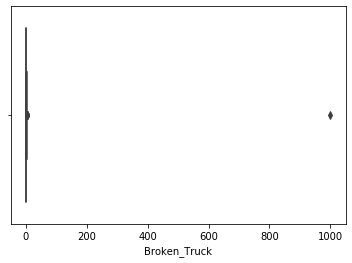

In [396]:
#Find IQR and outliers
import seaborn as sns
sns.boxplot(data_working['Broken_Truck'])

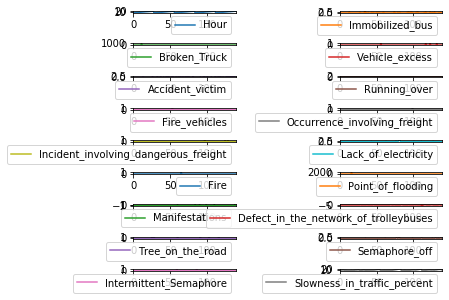

In [397]:
fig, axes = plt.subplots(nrows=9, ncols=2)
data_working.plot(subplots=True, ax=axes.flatten()[:18])

#plt.set_tight_layout(True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Applying Z score to eliminate outliers
z = (x - mean(x))/SD

In [404]:
data_working_out = data_working[(np.abs(stats.zscore(data_working)) < 3).all(axis=1)]

1. For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
2. Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
3. all(axis=1) ensures that for each row, all column satisfy the constraint.
4. Finally, result of this condition is used to index the dataframe.

In [399]:
#Q1 = data_working.quantile(0.25)
#Q3 = data_working.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [400]:
#upperLimit = Q3 + (1.5 * IQR)
#lowerLimit = Q1 - (1.5 * IQR)
#print(lowerLimit)
#print(upperLimit)

#data_working_out = data_working[~((data_working < lowerLimit) | (data_working > upperLimit)).any(axis=1)]
#print(data_working_out)
#data_working.shape
#data_working_out.shape

Normality Testing:
Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.
In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). 
The skewness value can be positive or negative, or even undefined. 
If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
As a general rule of thumb:
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [401]:
print(data_working_out.skew())

Hour                                     0.249635
Immobilized_bus                          2.395030
Broken_Truck                             0.937965
Vehicle_excess                           0.000000
Accident_victim                          1.826121
Running_over                             0.000000
Fire_vehicles                            0.000000
Occurrence_involving_freight             0.000000
Incident_involving_dangerous_freight     0.000000
Lack_of_electricity                      0.000000
Fire                                     0.000000
Point_of_flooding                        0.000000
Manifestations                           0.000000
Defect_in_the_network_of_trolleybuses    0.000000
Tree_on_the_road                         0.000000
Semaphore_off                            0.000000
Intermittent_Semaphore                   0.000000
Slowness_in_traffic_percent              0.492122
dtype: float64


In [405]:
data_working_out

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
1,7.3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8.3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1
5,9.3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
6,10.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
7,10.3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
8,11.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6
9,11.3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4
10,12.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2
